### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.ensemble import IsolationForest
import matplotlib
from matplotlib import pyplot as plt

### 2. Data Import and Formatting
#### 2.1 Import

In [2]:
beers_data = pd.read_excel("datasets/beers.xlsx")

#### 2.2 Formatting
Usunięcie kolumny 'Description', ponieważ dane typu string zawarte w tej kolumnie nie mogą być łatwo przetłumaczone na dane liczbowe bądź etykiety- wymagałoby to zastosowania algorytmów NLP. <br>

Usunięcie kolumny 'Beer Name (Full)', ponieważ jest ona zlepkiem kolumn 'Name', 'Brewery' i 'Style'- sama w sobie nie dostarcza żadnej nowej informacji. <br>

Ustawienie indeksu na ['Name', 'Brewery', 'Style'], ponieważ chcemy, żeby każdy indeks był unikalny, a dodatkowo chcemy zachować te kolumny do dalszej analizy, np. do problemu klasyfikacji. <br>

Pozostawienie tylko siedmiu cech do dalszej analizy: ['Bitter', 'Hoppy', 'Body', 'Fruits', 'Alcohol', 'Sour', 'review_aroma']



In [3]:
beers_data.head()

Name    Style  \
0                         Amber  Altbier   
1                    Double Bag  Altbier   
2                Long Trail Ale  Altbier   
3                  Doppelsticke  Altbier   
4  Sleigh'r Dark Doüble Alt Ale  Altbier   

                                            Brewery  \
0                               Alaskan Brewing Co.   
1                            Long Trail Brewing Co.   
2                            Long Trail Brewing Co.   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Uerige   
4                           Ninkasi Brewing Company   

                                    Beer Name (Full)  \
0                  Alaskan Brewing Co. Alaskan Amber   
1                  Long Trail Brewing Co. Double Bag   
2              Long Trail Brewing Co. Long Trail Ale   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
4  Ninkasi Brewing Company Sleigh'r Dark Doüble A...   

                                         Description  ABV  Min IBU  Max IBU  \
0  Notes:Richly malty and long on the palate, wit...  5.3       25       50   
1  Notes:This malty, full-bodied double alt is al...  7.2       25       50   
2  Notes:Long Trail Ale is a full-bodied amber al...  5.0       25       50   
3                                             Notes:  8.5       25       50   
4  Notes:Called 'Dark Double Alt' on the label.Se...  7.2       25       50   

   Astringency  Body  ...  Fruits  Hoppy  Spices  Malty  review_aroma  \
0           13    32  ...      33     57       8    111      3.498994   
1           12    57  ...      24     35      12     84      3.798337   
2           14    37  ...      10     54       4     62      3.409814   
3           13    55  ...      49     40      16    119      4.148098   
4           25    51  ...      11     51      20     95      3.625000   

   review_appearance  review_palate review_taste  review_overall  \
0           3.636821       3.556338     3.643863        3.847082   
1           3.846154       3.904366     4.024948        4.034304   
2           3.667109       3.600796     3.631300        3.830239   
3           4.033967       4.150815     4.205163        4.005435   
4           3.973958       3.734375     3.765625        3.817708   

   number_of_reviews  
0                497  
1                481  
2                377  
3                368  
4                 96  

[5 rows x 25 columns]

In [4]:
beers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [5]:
beers_data.drop(columns = ['Description'] , inplace=True)

In [6]:
len(beers_data['Name'].unique()) #nie możemy użyć 'Name' jako 
len(beers_data['Beer Name (Full)'].unique()) #ok

3197

In [7]:
beers_data.drop(columns = ['Beer Name (Full)'] , inplace=True)

In [8]:
beers_data[['Name', 'Brewery', 'Style']].drop_duplicates()
beers_data.set_index(['Name', 'Brewery', 'Style'], inplace=True)

In [9]:
beers_data = beers_data[['Bitter', 'Hoppy', 'Body', 'Fruits', 'Alcohol', 'Sour', 'review_aroma']]

### 3. Exploratory Data Analysis
#### 3.1 General

Stworzenie scatter_matrix dla wszystkich cech, czyli histogramy i wykresy zależności dwóch cech od siebie. 

In [10]:
beers_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3197 entries, ('Amber', 'Alaskan Brewing Co.', 'Altbier') to ('Frosted Frog Christmas Ale - Barrel-Aged', "Hoppin' Frog Brewery", 'Winter Warmer')
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bitter        3197 non-null   int64  
 1   Hoppy         3197 non-null   int64  
 2   Body          3197 non-null   int64  
 3   Fruits        3197 non-null   int64  
 4   Alcohol       3197 non-null   int64  
 5   Sour          3197 non-null   int64  
 6   review_aroma  3197 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 222.8+ KB


In [11]:
beers_data.describe()

Bitter        Hoppy         Body       Fruits      Alcohol  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean     36.364404    40.924617    46.129496    38.529559    17.055990   
std      25.791152    30.403641    25.947842    32.296646    17.331334   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      17.000000    18.000000    29.000000    12.000000     6.000000   
50%      31.000000    33.000000    40.000000    29.000000    11.000000   
75%      52.000000    56.000000    58.000000    60.000000    22.000000   
max     150.000000   172.000000   175.000000   175.000000   139.000000   

              Sour  review_aroma  
count  3197.000000   3197.000000  
mean     33.145449      3.638789  
std      35.780172      0.503209  
min       0.000000      1.509615  
25%      11.000000      3.422559  
50%      22.000000      3.720183  
75%      42.000000      3.978000  
max     284.000000      5.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEF10FCCD0>,
      dtype=object)

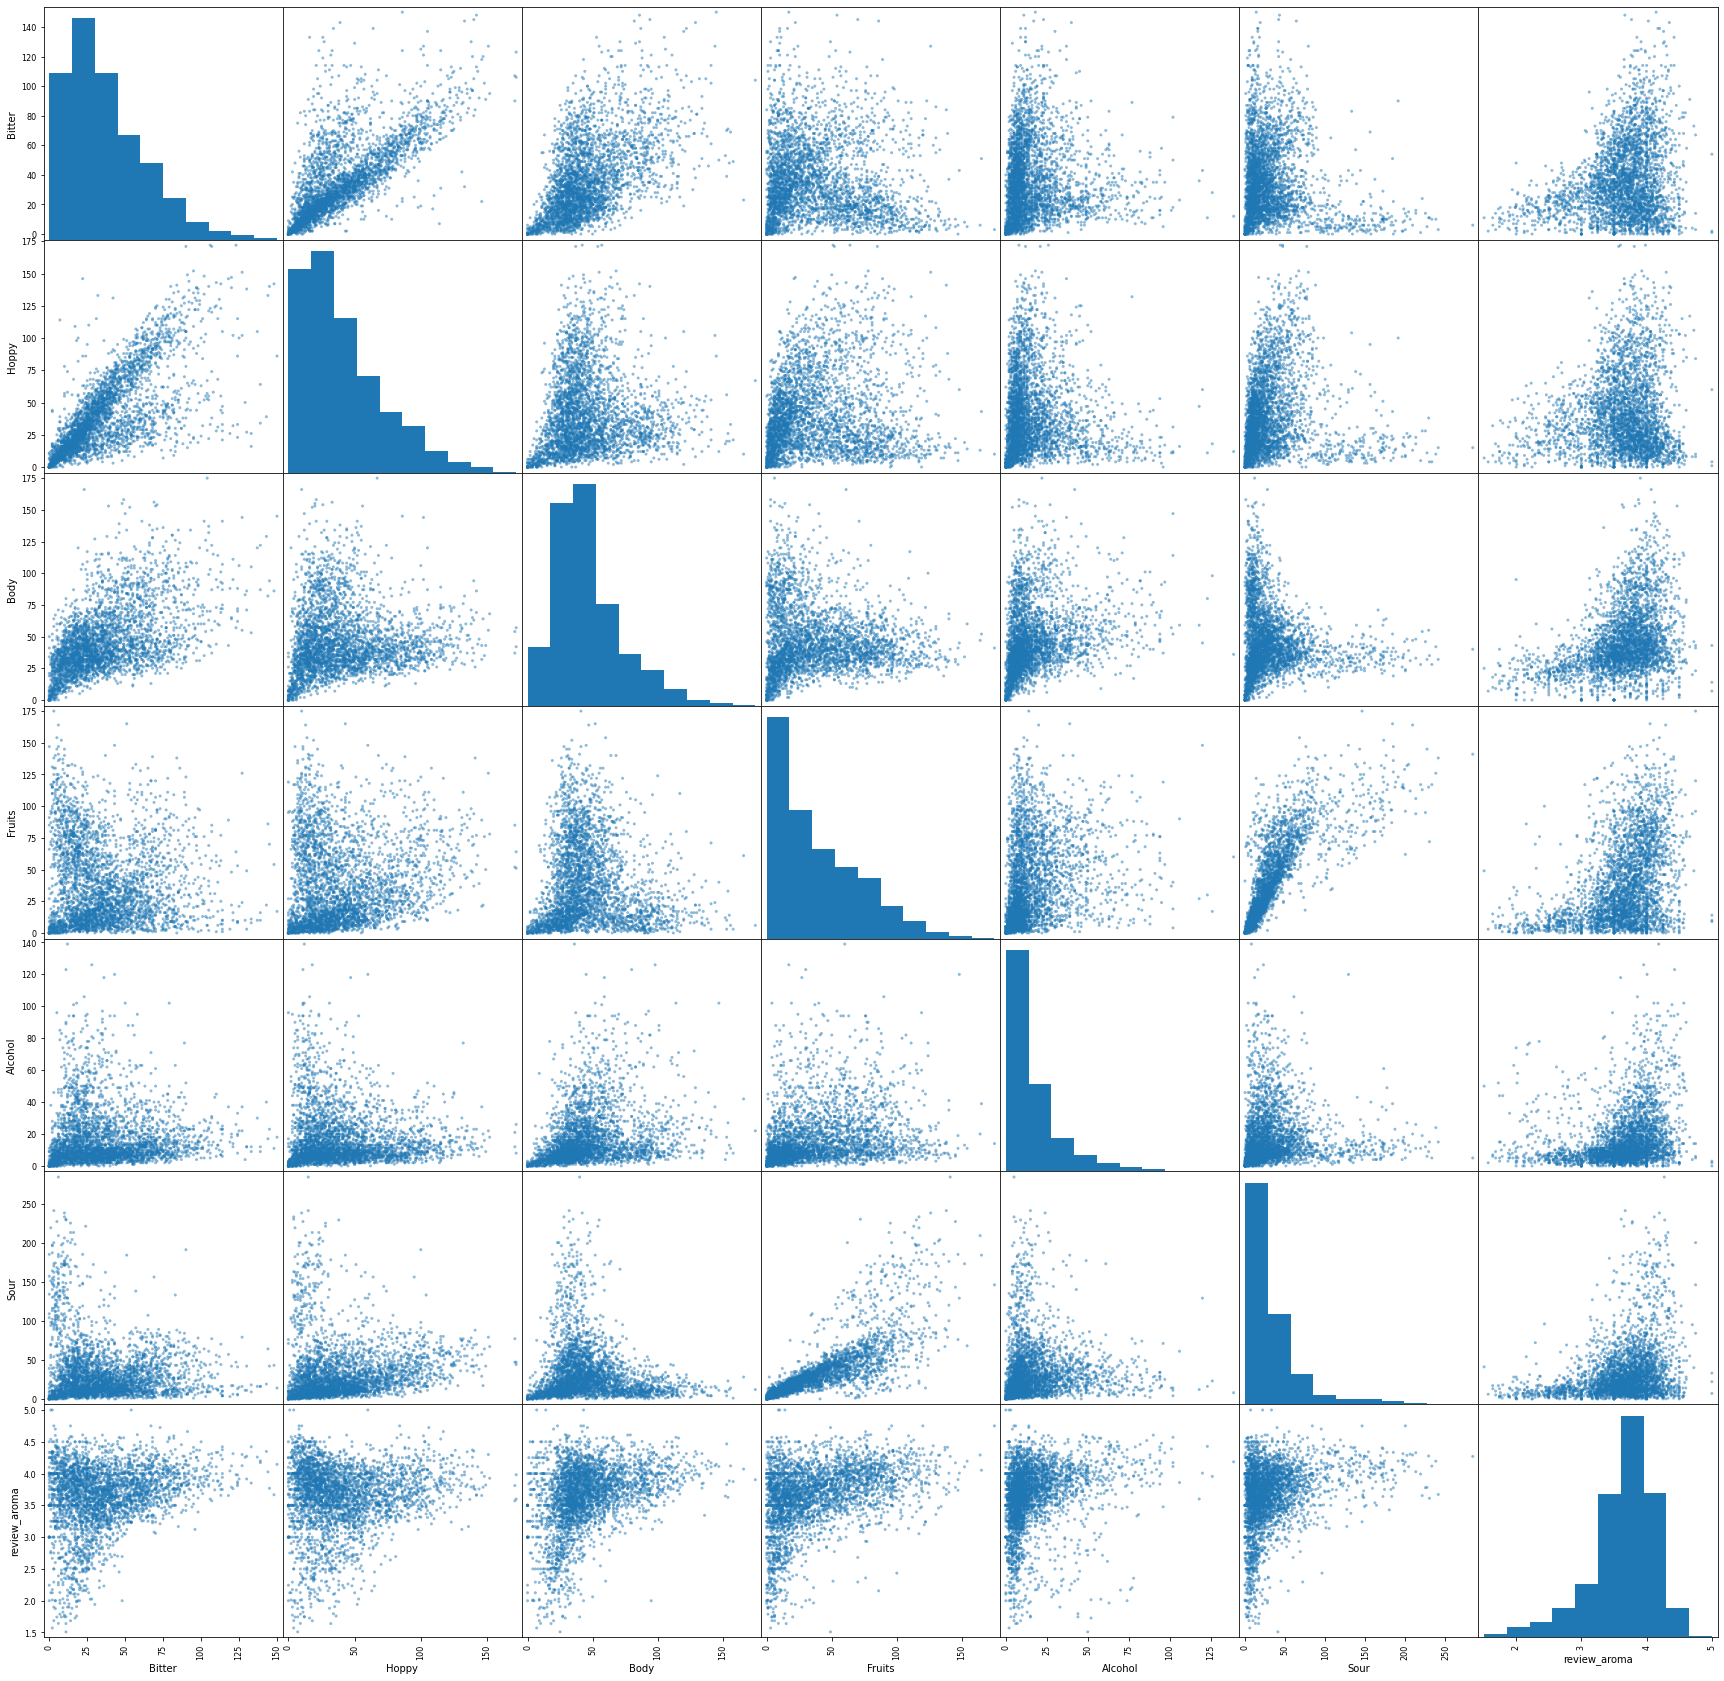

In [12]:
scatter_matrix(beers_data, figsize=(30,30))

#### 3.2 Outliers
Standard univariate method of outlier detection is Z-score filter...

In [13]:
beers_data[beers_data.columns]

Bitter  \
Name                                     Brewery                                          Style                   
Amber                                    Alaskan Brewing Co.                              Altbier            47   
Double Bag                               Long Trail Brewing Co.                           Altbier            33   
Long Trail Ale                           Long Trail Brewing Co.                           Altbier            42   
Doppelsticke                             Uerige Obergärige Hausbrauerei GmbH / Zum Uerige Altbier            47   
Sleigh'r Dark Doüble Alt Ale             Ninkasi Brewing Company                          Altbier            44   
...                                                                                                         ...   
Winter Shredder                          Cisco Brewers Inc.                               Winter Warmer      35   
The First Snow Ale                       RJ Rockers Brewing Company                       Winter Warmer      16   
Red Nose Winter Ale                      Natty Greene's Pub & Brewing Co.                 Winter Warmer      19   
Fish Tale Winterfish                     Fish Brewing Company / Fishbowl Brewpub          Winter Warmer      70   
Frosted Frog Christmas Ale - Barrel-Aged Hoppin' Frog Brewery                             Winter Warmer      13   

                                                                                                         Hoppy  \
Name                                     Brewery                                          Style                  
Amber                                    Alaskan Brewing Co.                              Altbier           57   
Double Bag                               Long Trail Brewing Co.                           Altbier           35   
Long Trail Ale                           Long Trail Brewing Co.                           Altbier           54   
Doppelsticke                             Uerige Obergärige Hausbrauerei GmbH / Zum Uerige Altbier           40   
Sleigh'r Dark Doüble Alt Ale             Ninkasi Brewing Company                          Altbier           51   
...                                                                                                        ...   
Winter Shredder                          Cisco Brewers Inc.                               Winter Warmer     45   
The First Snow Ale                       RJ Rockers Brewing Company                       Winter Warmer     14   
Red Nose Winter Ale                      Natty Greene's Pub & Brewing Co.                 Winter Warmer     21   
Fish Tale Winterfish                     Fish Brewing Company / Fishbowl Brewpub          Winter Warmer    110   
Frosted Frog Christmas Ale - Barrel-Aged Hoppin' Frog Brewery                             Winter Warmer     16   

                                                                                                         Body  \
Name                                     Brewery                                          Style                 
Amber                                    Alaskan Brewing Co.                              Altbier          32   
Double Bag                               Long Trail Brewing Co.                           Altbier          57   
Long Trail Ale                           Long Trail Brewing Co.                           Altbier          37   
Doppelsticke                             Uerige Obergärige Hausbrauerei GmbH / Zum Uerige Altbier          55   
Sleigh'r Dark Doüble Alt Ale             Ninkasi Brewing Company                          Altbier          51   
...                                                                                                       ...   
Winter Shredder                          Cisco Brewers Inc.                               Winter Warmer    37   
The First Snow Ale                       RJ Rockers Brewing Company                       Winter Warmer    31

In [14]:
clf = IsolationForest(random_state=0)
beer_data_iso = beers_data[beers_data.columns].to_numpy().astype(float)
clf.fit(beer_data_iso)
beers_data['outlier'] = clf.predict(beer_data_iso)
beers_data[beers_data['outlier'] == -1]

Bitter  \
Name                                           Brewery                                   Style                           
Olde School Barleywine                         Dogfish Head Brewery                      Barleywine - American      56   
Brewer's Reserve Bourbon Barrel Barleywine     Central Waters Brewing Company            Barleywine - American      40   
Old Ruffian                                    Great Divide Brewing Company              Barleywine - American     107   
Behemoth                                       Three Floyds Brewing Co. & Brewpub        Barleywine - American      90   
Lower De Boom Barleywine                       21st Amendment Brewery                    Barleywine - American      67   
...                                                                                                                ...   
Barrel Aged Brrrbon (Brothers' Reserve Series) Widmer Brothers Brewing Company           Winter Warmer              36   
Bourbon Barrel Aged Winter Warmer              Rahr & Sons Brewing Company               Winter Warmer              35   
Mogul Madness Ale                              Rogue Ales                                Winter Warmer             109   
God Jul                                        Nøgne Ø - Det Kompromissløse Bryggeri A/S Winter Warmer              78   
Fish Tale Winterfish                           Fish Brewing Company / Fishbowl Brewpub   Winter Warmer              70   

                                                                                                                Hoppy  \
Name                                           Brewery                                   Style                          
Olde School Barleywine                         Dogfish Head Brewery                      Barleywine - American     43   
Brewer's Reserve Bourbon Barrel Barleywine     Central Waters Brewing Company            Barleywine - American     23   
Old Ruffian                                    Great Divide Brewing Company              Barleywine - American    120   
Behemoth                                       Three Floyds Brewing Co. & Brewpub        Barleywine - American    105   
Lower De Boom Barleywine                       21st Amendment Brewery                    Barleywine - American     98   
...                                                                                                               ...   
Barrel Aged Brrrbon (Brothers' Reserve Series) Widmer Brothers Brewing Company           Winter Warmer             47   
Bourbon Barrel Aged Winter Warmer              Rahr & Sons Brewing Company               Winter Warmer             32   
Mogul Madness Ale                              Rogue Ales                                Winter Warmer            124   
God Jul                                        Nøgne Ø - Det Kompromissløse Bryggeri A/S Winter Warmer             78   
Fish Tale Winterfish                           Fish Brewing Company / Fishbowl Brewpub   Winter Warmer            110   

                                                                                                                Body  \
Name                                           Brewery                                   Style                         
Olde School Barleywine                         Dogfish Head Brewery                      Barleywine - American    55   
Brewer's Reserve Bourbon Barrel Barleywine     Central Waters Brewing Company            Barleywine - American    65   
Old Ruffian                                    Great Divide Brewing Company              Barleywine - American    55   
Behemoth                                       Three Floyds Brewing Co. & Brewpub        Barleywine - American    71   
Lower De Boom Barleywine                       21st Amendment Brewery                    Barleywine - American    60   
...                                                                                                            

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEF417DEB0>,
      dtype=object)

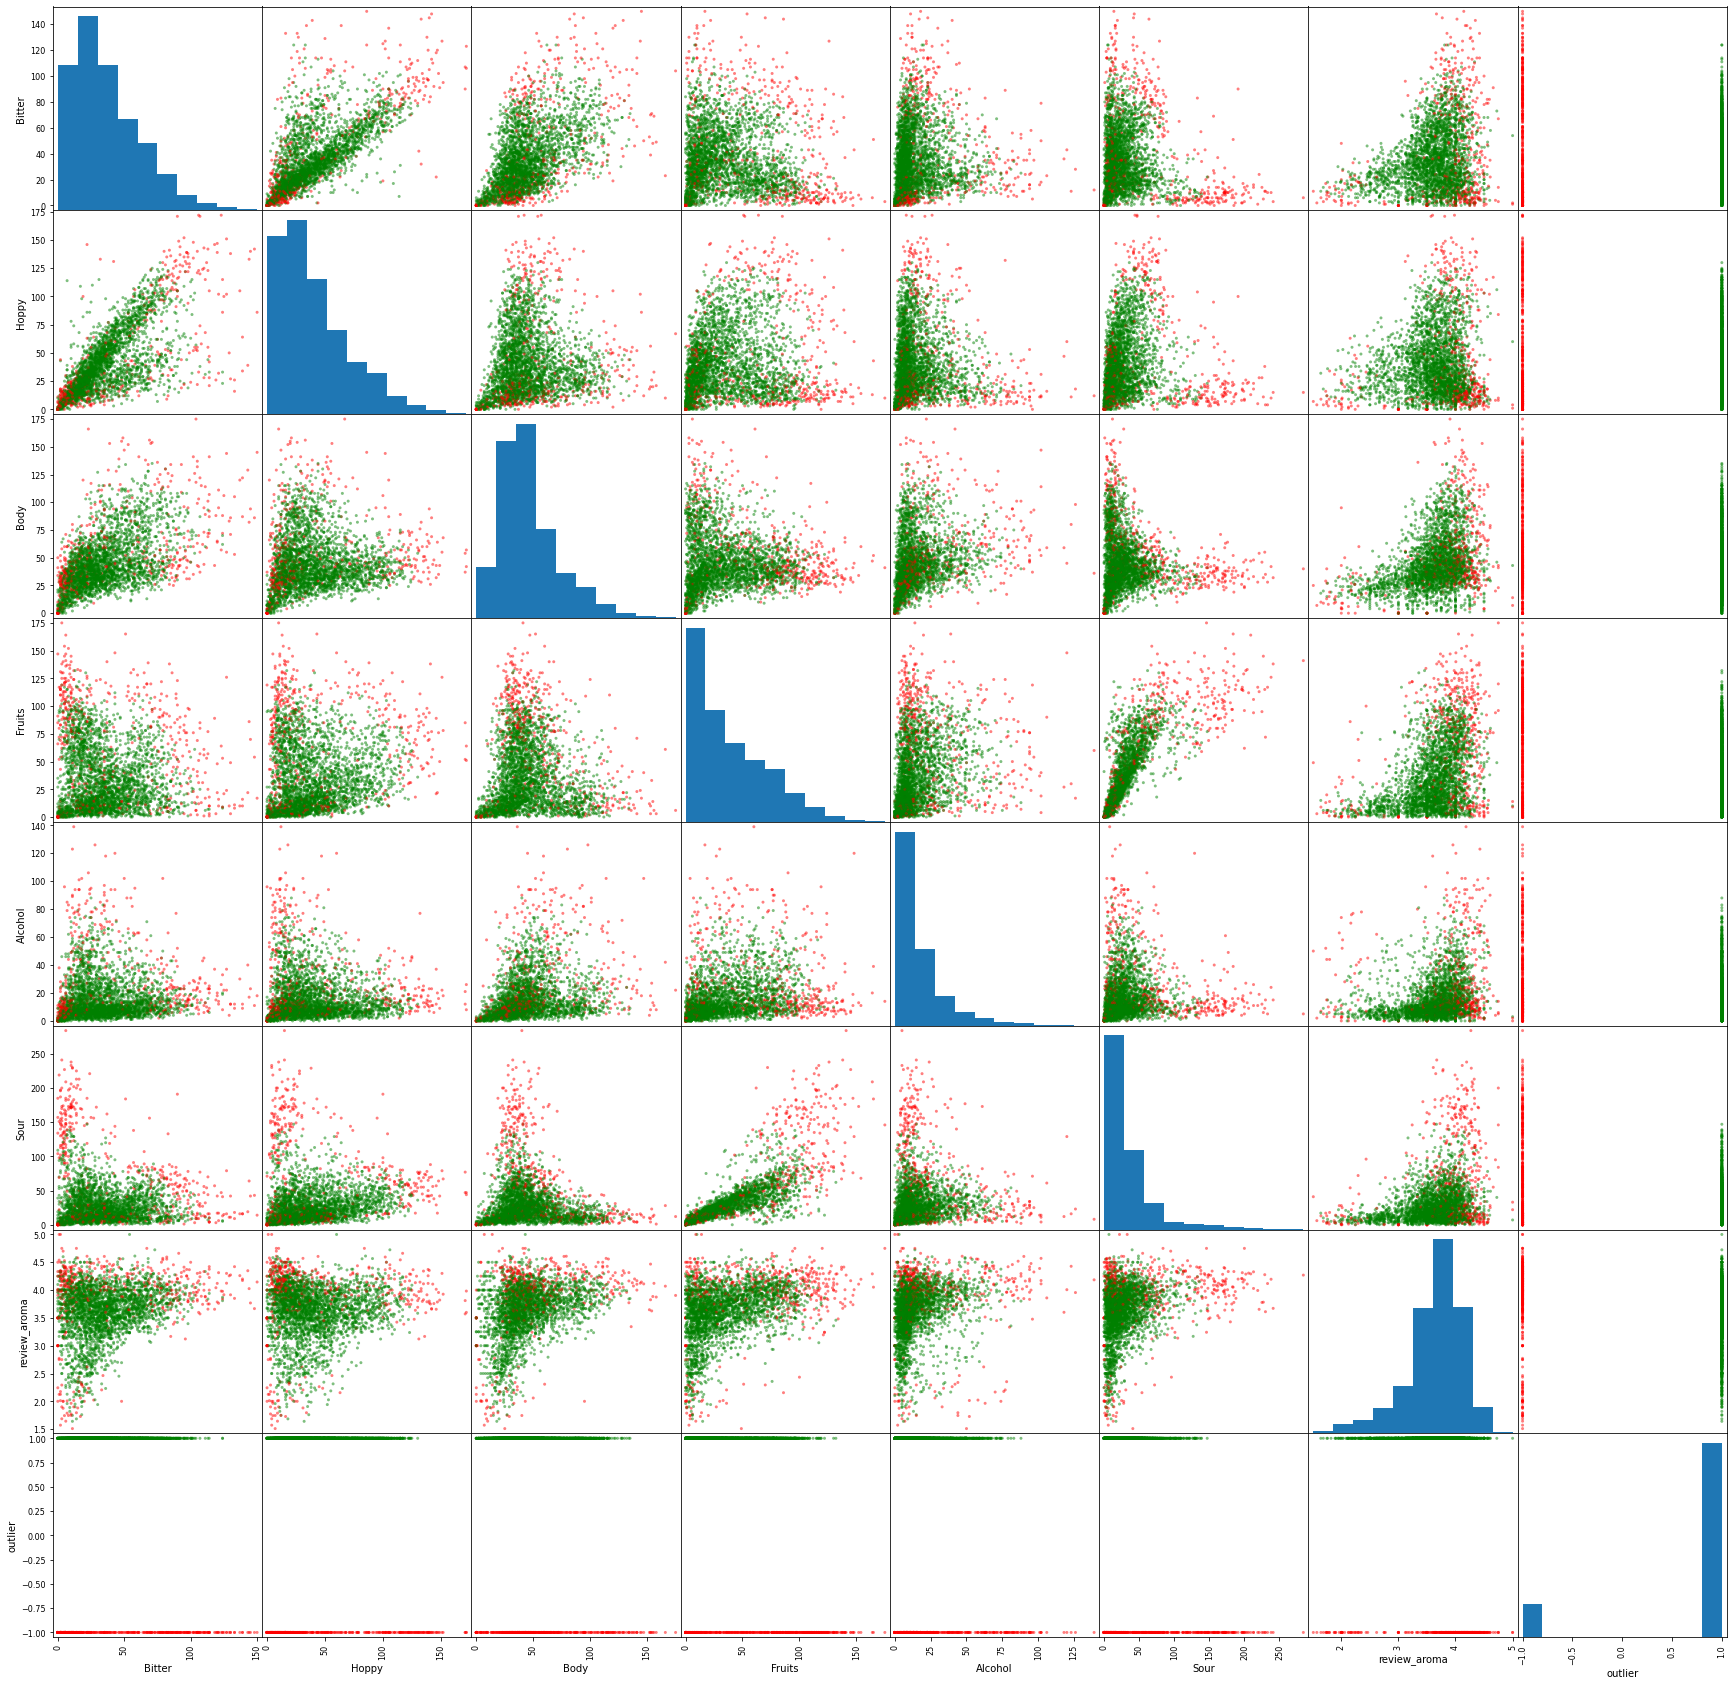

In [16]:
colors=['Red', 'Green']
scatter_matrix(beers_data, figsize=(30,30), c=beers_data['outlier'], cmap=matplotlib.colors.ListedColormap(colors))

### 4. Clusterization


#### 4.1 K-Means

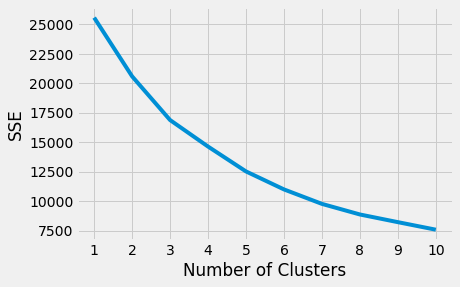

5

In [17]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(beers_data)

kmeans_kwargs = {
    "init" : "random",
    "n_init" : 10,
    "max_iter" : 300,
    "random_state" : 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEF3C2E9A0>,
      dtype=object)

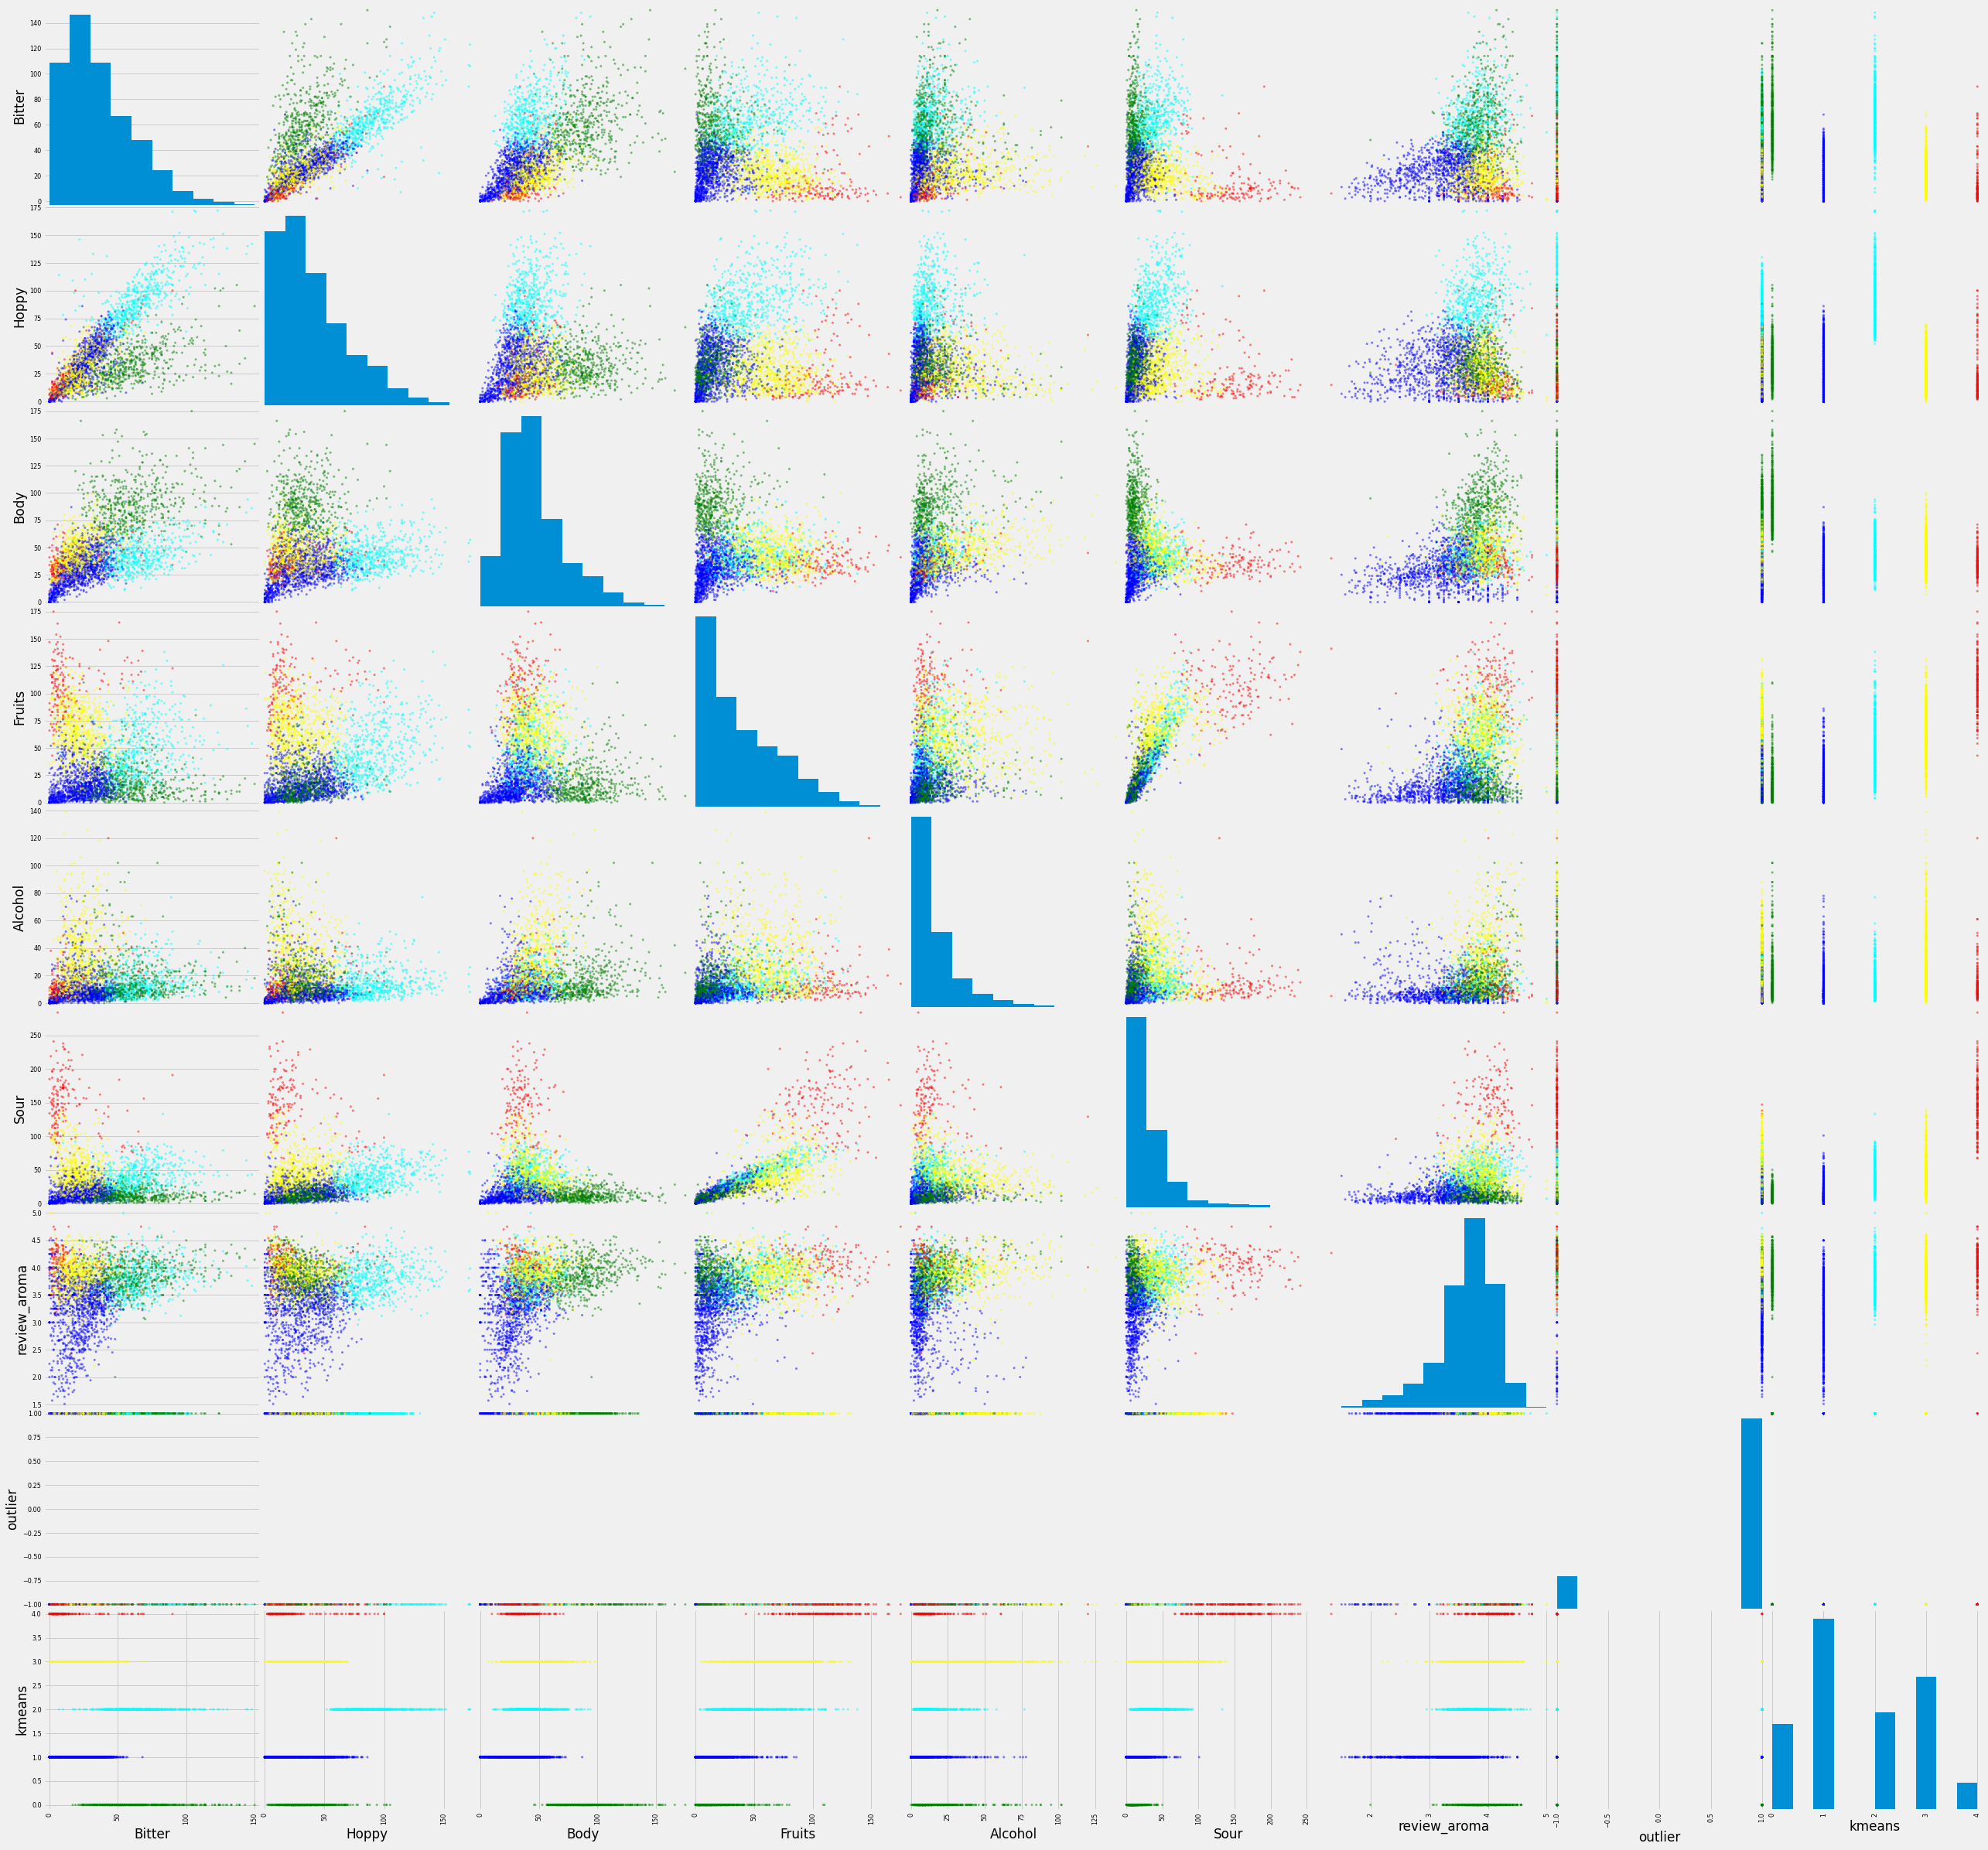

In [18]:
kmeans = KMeans(n_clusters=5, **kmeans_kwargs)
kmeans.fit(scaled_features)
beers_data['kmeans'] = kmeans.predict(scaled_features)

colors = {'Red', 'Green', 'Blue', 'Yellow', 'Cyan'}
scatter_matrix(beers_data, figsize=(40,40), c=beers_data['kmeans'], cmap=matplotlib.colors.ListedColormap(colors))

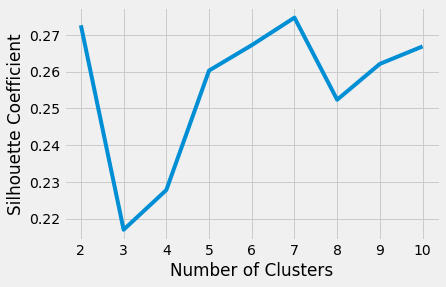

In [19]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [20]:
style_clusters = beers_data.reset_index()[['Style', 'kmeans']]
style_clusters['count'] = 1
pd.pivot_table(style_clusters, index = ['Style'], columns = ['kmeans'], aggfunc=np.sum).to_excel('kmeans_clusters1.xlsx')

#### 4.2 DBSCAN

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round(2)

In [22]:
kmeans_silhouette

0.23

In [23]:
dbscan_silhouette

-0.34

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE83C38DF0>,
      dtype=object)

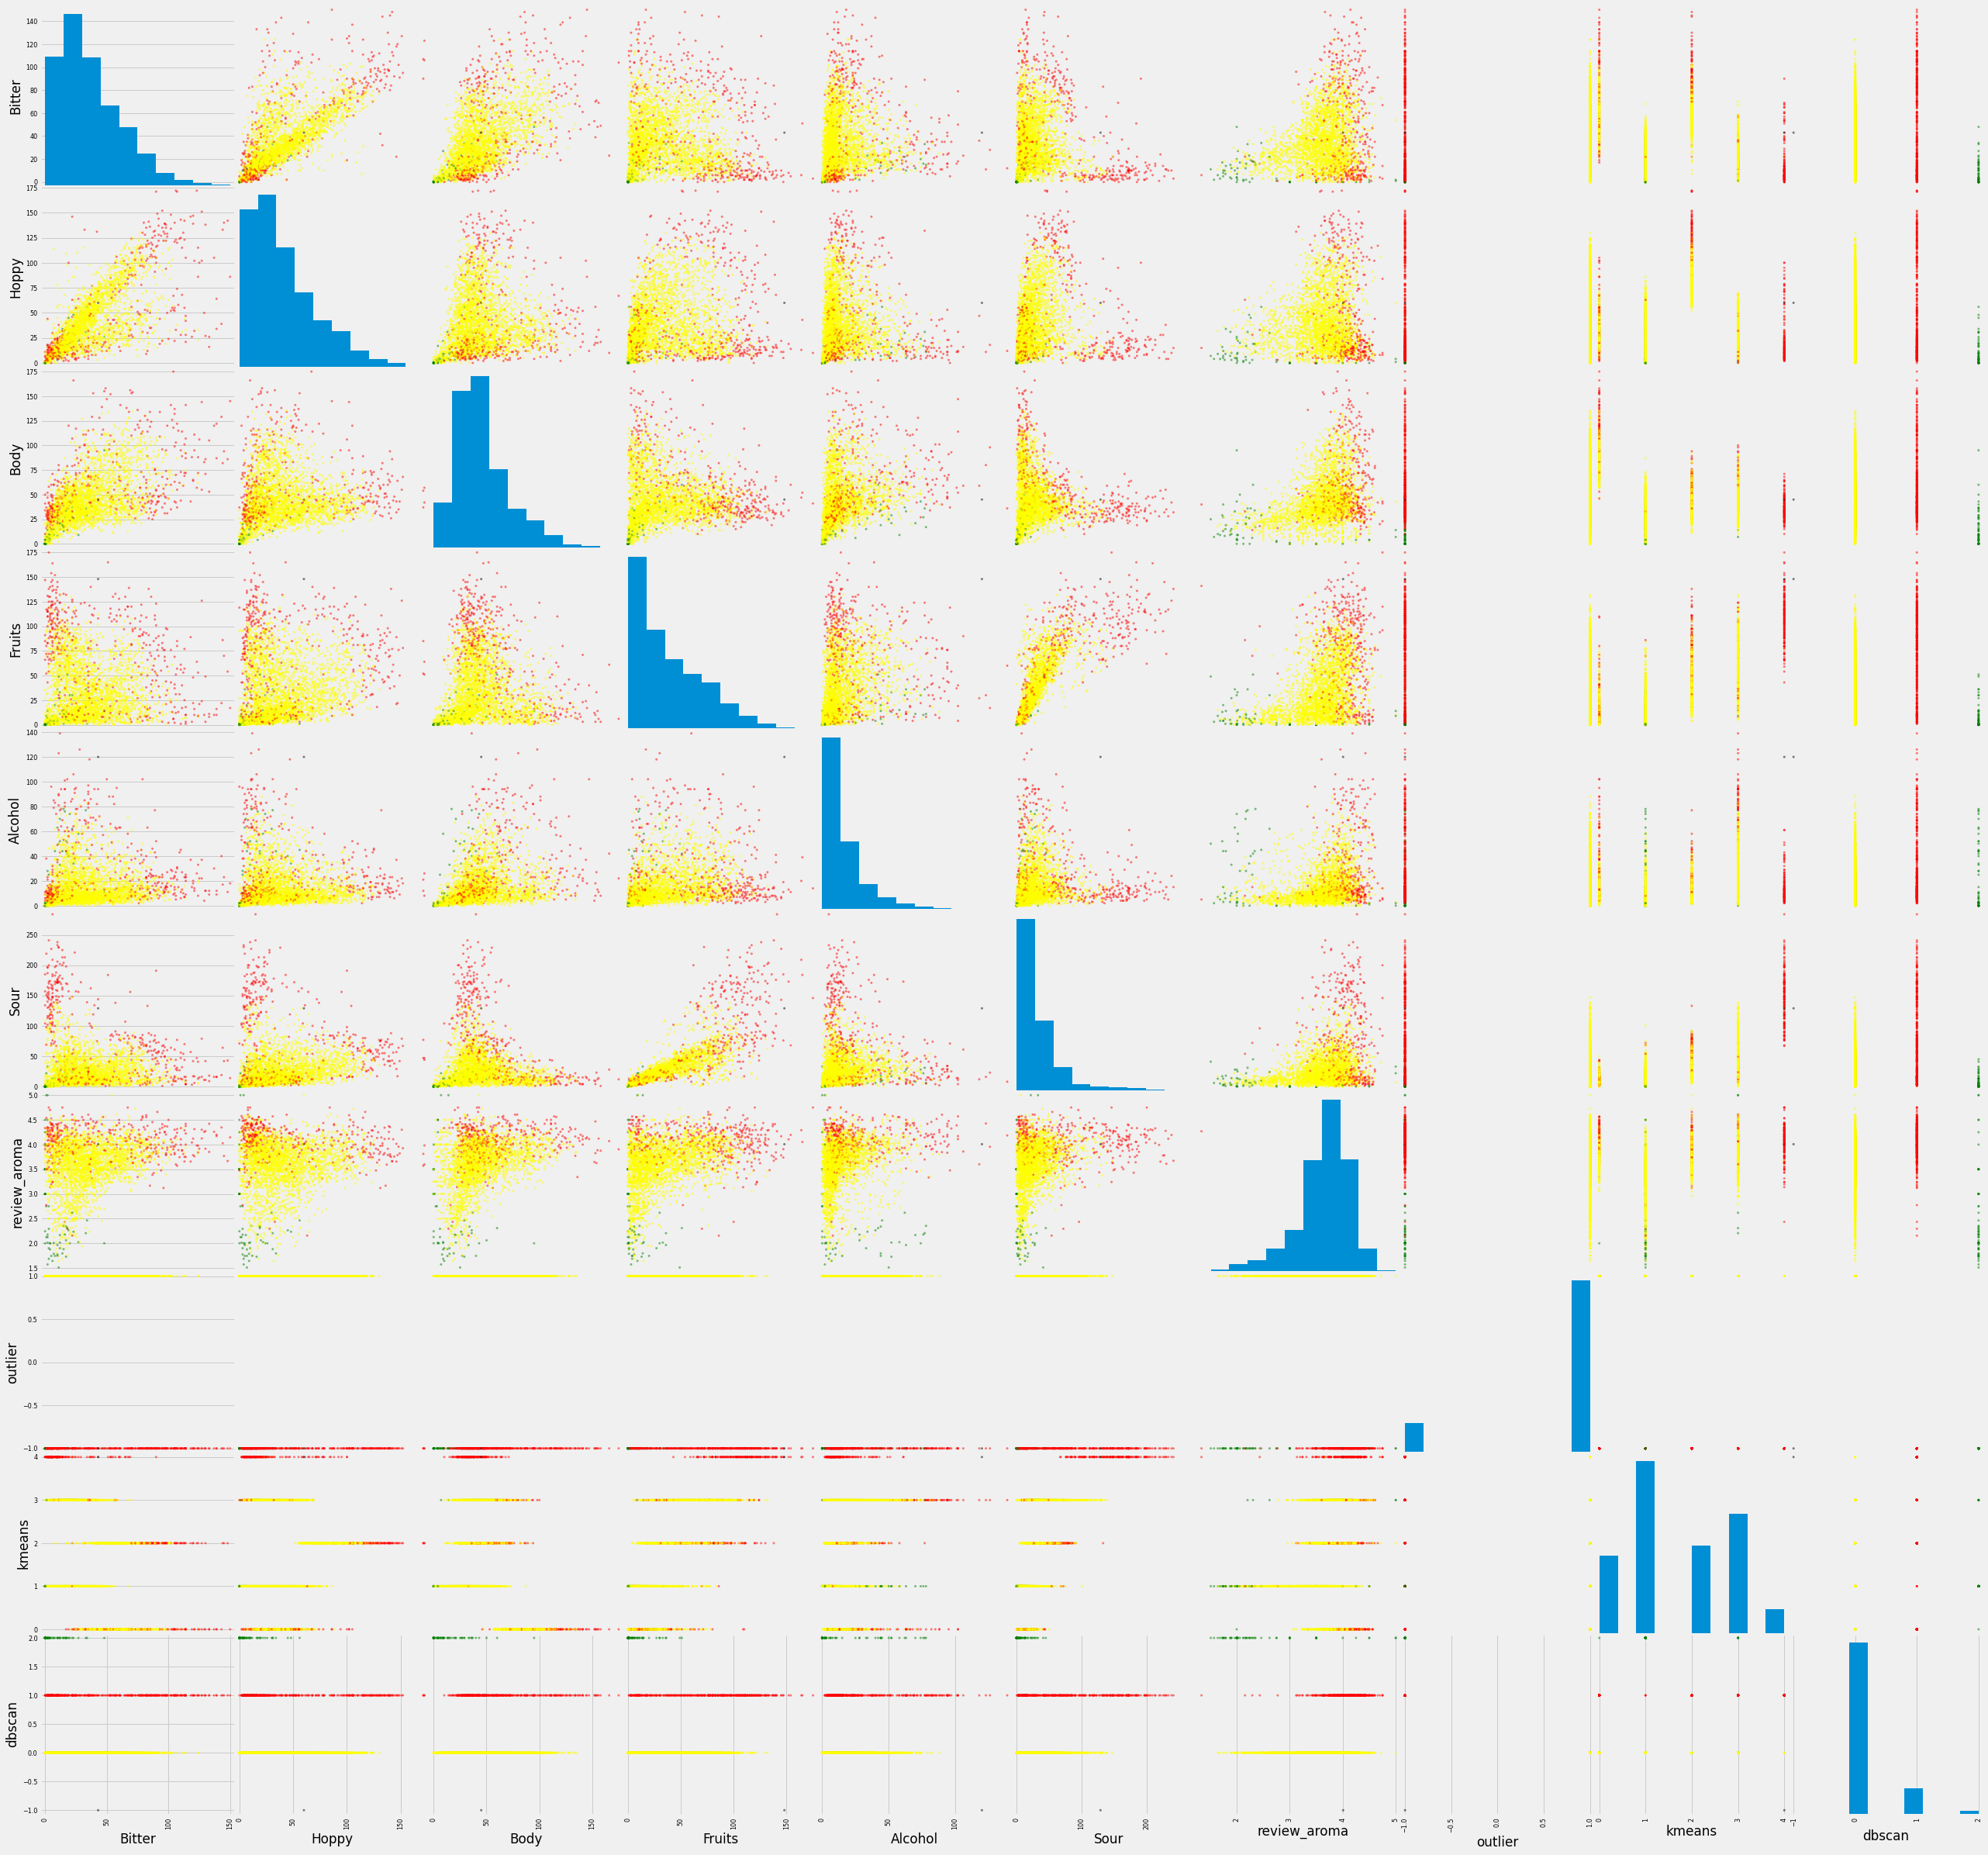

In [25]:
dbscan = DBSCAN(eps=2.5)
beers_data['dbscan'] = dbscan.fit_predict(scaled_features)

colors = ['black', 'yellow', 'blue', 'red', 'green']
scatter_matrix(beers_data, figsize=(40,40), c=beers_data['dbscan'], cmap=matplotlib.colors.ListedColormap(colors))



### 5. Classification